# Tugas Praktikum

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from minisom import MiniSom
from skimage import io, img_as_float
from skimage.transform import resize


### Tugas

1. Gunakan data 'Mall_Customers.csv'

In [4]:
df = pd.read_csv('data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Menentukan Fitur untuk Clustering

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


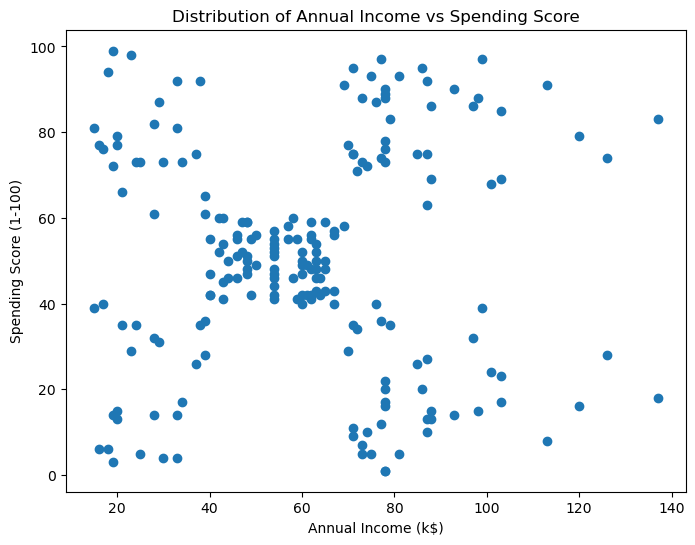

In [5]:
# Load dataset
df = pd.read_csv('data/Mall_Customers.csv')

# Memilih dua fitur: 'Annual Income (k$)' dan 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Menampilkan 5 data teratas
print(X.head())

# Visualisasi data untuk melihat distribusi
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.title('Distribution of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

c:\Users\PJBS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PJBS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PJBS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PJBS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

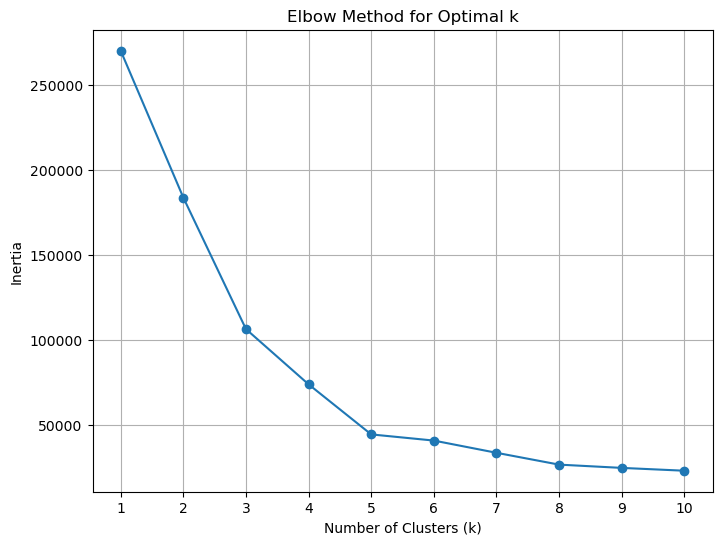

c:\Users\PJBS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


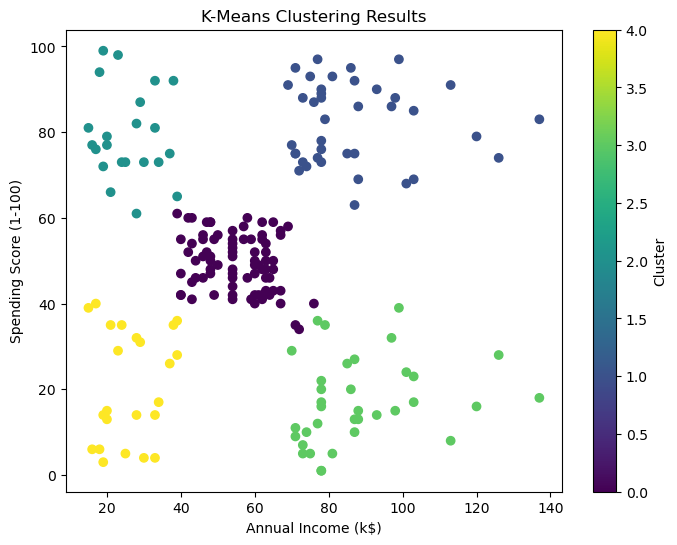

In [6]:
# Load dataset
df = pd.read_csv('data/Mall_Customers.csv')

# Memilih dua fitur: 'Annual Income (k$)' dan 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Metode Elbow untuk menentukan jumlah k yang optimal
inertia = []
k_range = range(1, 11)  # Rentang nilai k dari 1 hingga 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Menyimpan nilai inertia

# Visualisasi hasil Metode Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

# Setelah menentukan k yang optimal, misalnya k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Menambahkan label cluster ke DataFrame
df['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


4. Buatlah  implementasi model SOM untuk segmentasi citra lain

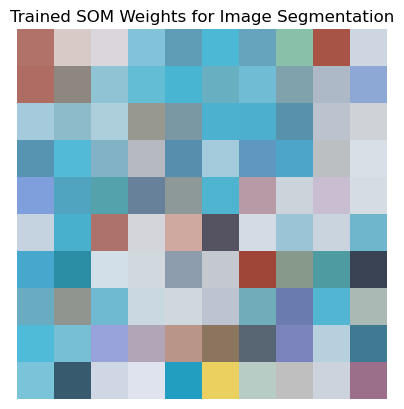

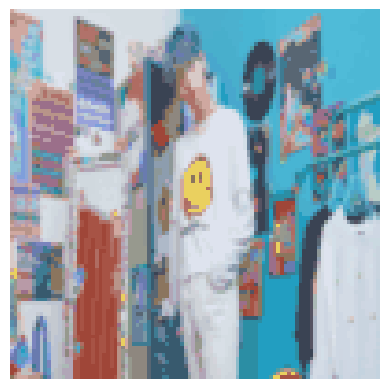

In [12]:
# Fungsi untuk menampilkan gambar hasil segmentasi
def plot_segmented_image(weights, image_shape):
    segmented_image = np.zeros((image_shape[0], image_shape[1], 3))  # Buat citra kosong
    for i in range(image_shape[0]):
        for j in range(image_shape[1]):
            # Ambil unit pemenang dari bobot SOM
            winner = som.winner(image_small[i, j])
            segmented_image[i, j] = weights[winner]
    
    plt.imshow(segmented_image)
    plt.axis('off')
    plt.show()

# 1. Load dan praproses citra
image_path = "data/soobin-blue-hour.jpg" 
image = io.imread(image_path)
image = img_as_float(image)  # Konversi ke float antara [0, 1]

# 2. Resize gambar untuk mempercepat pelatihan
image_small = resize(image, (100, 100))

# 3. Buat model SOM
input_len = image_small.shape[2]  # Jumlah saluran warna (RGB)
som = MiniSom(10, 10, input_len, sigma=1.0, learning_rate=0.5)

# 4. Inisialisasi bobot SOM dan latih SOM dengan citra
som.random_weights_init(image_small.reshape(-1, input_len))
som.train_random(image_small.reshape(-1, input_len), 100)  # Misal 100 iterasi

# 5. Visualisasi hasil bobot SOM yang terlatih
weights = som.get_weights()
plt.imshow(weights[:, :, :3])  # Plot bobot SOM
plt.title('Trained SOM Weights for Image Segmentation')
plt.axis('off')
plt.show()

# 6. Visualisasi hasil segmentasi citra
plot_segmented_image(weights, image_small.shape)